# Example of using the Borehole3D class

## Imports

In [1]:
from striplog import Component, Decor, Legend, Lexicon, Striplog
from core.visual import Borehole3D, striplog_legend_to_omf_legend 
from utils.lexicon.lexicon_memoris import lexicon_memoris, lithology_memoris, pollutants_memoris, CONTAMINATION_LEVELS_MEMORIS
from utils.orm import boreholes_from_dataframe
from utils.io import dataframe_viewer
from core.project import Project
from core.orm import BoreholeOrm, PositionOrm, Base 
import random
from os import remove
import re
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
from sqlalchemy.orm import sessionmaker
from definitions import ROOT_DIR

## Reading of CSV files in a dir

In [2]:
#df = pd.read_csv('test_data_boreholes.csv', sep=',') # use english lexicon
df = pd.read_csv('test_litho_fr.csv', sep=',') # use french lexicon

In [3]:
all_pollutants = pollutants_memoris.pollutant

## Data Checking

In [4]:
#df[['Pollutant', 'Concentration']] = ''
df.drop(columns=['Pollutant', 'Concentration', 'Unit'], inplace=True)
#df['Concentration'] = df['Concentration'].apply(lambda x: np.random.randint(0,100))
#df['Unit'] = 'mg/l'

In [5]:
pol_lev = ['VR','VS','VI', 'Inconnu']
df[all_pollutants[0:2]] = ''
df[all_pollutants[0]] = df[all_pollutants[0]].apply(lambda x: random.sample(pol_lev, 1)[0])
df[all_pollutants[1]] = df[all_pollutants[1]].apply(lambda x: random.sample(pol_lev, 1)[0])

In [6]:
df['Lithology'] = df['Lithology'].replace({'Grès':'Marne', 'Calcaire':'Dolomie'})

In [7]:
df.loc[35.5, :] = ['BH007',152794.0, 121111.0, 60.0, 0.57, 45, 'Calcaire', 'Bleu', 4, 41, 45, 'VS', 'VR']
df.loc[25.5, :] = ['BH005',152473.0, 121460.0, 72.0, 0.61, 32, 'Schiste', 'gris', 3, 29, 32, 'VI', 'VR']
df.loc[25.6, :] = ['BH005',152473.0, 121460.0, 68.0, 0.61, 36, 'Calcaire', 'Bleu', 4, 32, 36, 'Inconnu', 'VR']

df.drop(index=4, inplace=True)
df.drop(columns='Colour', inplace=True)
df = df.sort_index().reset_index(drop=True)

In [8]:
pollutants = [p for p in all_pollutants if p in df.columns]

In [9]:
dataframe_viewer(df)

Rows : 997, columns : 12


interactive(children=(IntSlider(value=10, description='rows', max=997, min=10, readout=False), IntSlider(value…

## Create Boreholes from dataframes or files

In [10]:
boreholes, components, link_intv_comp = boreholes_from_dataframe(df[:50], verbose=False,
                                                attributes=['Lithology']+pollutants, 
                                                symbols={'lithology':{'lexicon':lexicon_memoris}}, 
                                                diameter='Diameter', thickness='Thickness')


Dataframe processing...

|__ID:'BH001'
Summary : [Striplog(4 Intervals, start=0.0, stop=28.0)]

|__ID:'BH002'
Summary : [Striplog(5 Intervals, start=0.0, stop=37.0)]

|__ID:'BH003'
Summary : [Striplog(5 Intervals, start=0.0, stop=18.0)]

|__ID:'BH004'
Summary : [Striplog(5 Intervals, start=0.0, stop=26.0)]

|__ID:'BH005'
Summary : [Striplog(7 Intervals, start=0.0, stop=36.0)]

|__ID:'BH006'
Summary : [Striplog(5 Intervals, start=0.0, stop=26.0)]

|__ID:'BH007'
Summary : [Striplog(6 Intervals, start=0.0, stop=45.0)]

|__ID:'BH008'
Summary : [Striplog(5 Intervals, start=0.0, stop=35.0)]

|__ID:'BH009'
Summary : [Striplog(5 Intervals, start=0.0, stop=40.0)]

|__ID:'BH10'
Summary : [Striplog(3 Intervals, start=0.0, stop=11.0)]

End of the process : 10 unique ID found


/home/yanathan/Projects/GSDMA/utils/orm.py:126: SAWarning: relationship 'ComponentOrm.intervals' will copy column Components.id to column Linkintervalcomponent.comp_id, which conflicts with relationship(s): 'IntervalOrm.components' (copies Components.id to Linkintervalcomponent.comp_id). If this is not the intention, consider if these relationships should be linked with back_populates, or if viewonly=True should be applied to one or more if they are read-only. For the less common case that foreign key constraints are partially overlapping, the orm.foreign() annotation can be used to isolate the columns that should be written towards.   To silence this warning, add the parameter 'overlaps="components"' to the 'ComponentOrm.intervals' relationship.
  boreholes_orm.append(BoreholeOrm(id=bh_name, date=bh_date))
/home/yanathan/Projects/GSDMA/utils/orm.py:126: SAWarning: relationship 'ComponentOrm.intervals' will copy column Intervals.id to column Linkintervalcomponent.intv_id, which conflic

In [11]:
boreholes

[<core.orm.BoreholeOrm>(Name=BH001, Length=28.0, Diameter=0.43, Intervals=4),
 <core.orm.BoreholeOrm>(Name=BH002, Length=37.0, Diameter=0.6, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH003, Length=18.0, Diameter=0.41, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH004, Length=26.0, Diameter=0.61, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH005, Length=36.0, Diameter=0.61, Intervals=7),
 <core.orm.BoreholeOrm>(Name=BH006, Length=26.0, Diameter=0.31, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH007, Length=45.0, Diameter=0.57, Intervals=6),
 <core.orm.BoreholeOrm>(Name=BH008, Length=35.0, Diameter=0.39, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH009, Length=40.0, Diameter=0.5, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH10, Length=11.0, Diameter=0.31, Intervals=3)]

In [12]:
components

{0: Component({'lithology': 'sable'}),
 1: Component({'arsenic': 'vs'}),
 2: Component({'cadmium': 'vr'}),
 3: Component({'lithology': 'argile'}),
 4: Component({'lithology': 'marne'}),
 5: Component({'arsenic': 'inconnu'}),
 6: Component({'lithology': 'charbon'}),
 7: Component({'arsenic': 'vi'}),
 8: Component({'arsenic': 'vr'}),
 9: Component({'cadmium': 'inconnu'}),
 10: Component({'lithology': 'dolomie'}),
 11: Component({'cadmium': 'vi'}),
 12: Component({'cadmium': 'vs'}),
 13: Component({'lithology': 'schiste'}),
 14: Component({'lithology': 'calcaire'})}

In [13]:
link_intv_comp

{(0, 0): {'extra_data': ''},
 (0, 1): {'extra_data': ''},
 (0, 2): {'extra_data': ''},
 (1, 3): {'extra_data': ''},
 (1, 1): {'extra_data': ''},
 (1, 2): {'extra_data': ''},
 (2, 4): {'extra_data': ''},
 (2, 5): {'extra_data': ''},
 (2, 2): {'extra_data': ''},
 (3, 6): {'extra_data': ''},
 (3, 7): {'extra_data': ''},
 (3, 2): {'extra_data': ''},
 (4, 0): {'extra_data': ''},
 (4, 8): {'extra_data': ''},
 (4, 2): {'extra_data': ''},
 (5, 3): {'extra_data': ''},
 (5, 5): {'extra_data': ''},
 (5, 2): {'extra_data': ''},
 (6, 4): {'extra_data': ''},
 (6, 7): {'extra_data': ''},
 (6, 9): {'extra_data': ''},
 (7, 6): {'extra_data': ''},
 (7, 7): {'extra_data': ''},
 (7, 2): {'extra_data': ''},
 (8, 10): {'extra_data': ''},
 (8, 1): {'extra_data': ''},
 (8, 9): {'extra_data': ''},
 (9, 0): {'extra_data': ''},
 (9, 8): {'extra_data': ''},
 (9, 11): {'extra_data': ''},
 (10, 3): {'extra_data': ''},
 (10, 1): {'extra_data': ''},
 (10, 2): {'extra_data': ''},
 (11, 4): {'extra_data': ''},
 (11, 7)

In [14]:
link_intv_comp[(0, 0)]['extra_data'] = "{'porosite':1, 'densite':1.8}"

In [15]:
len(boreholes), len(components)

(10, 15)

## Create a project and save data in a database

In [16]:
remove('tmp_files/tfe_orm_db.db')

In [17]:
engine = create_engine('sqlite:///tmp_files/tfe_orm_db.db', echo=True)

In [18]:
Base.metadata.create_all(engine)

2021-08-07 23:16:52,549 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-08-07 23:16:52,550 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("Boreholes")
2021-08-07 23:16:52,550 INFO sqlalchemy.engine.Engine [raw sql] ()
2021-08-07 23:16:52,552 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("Boreholes")
2021-08-07 23:16:52,553 INFO sqlalchemy.engine.Engine [raw sql] ()
2021-08-07 23:16:52,555 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("Intervals")
2021-08-07 23:16:52,556 INFO sqlalchemy.engine.Engine [raw sql] ()
2021-08-07 23:16:52,557 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("Intervals")
2021-08-07 23:16:52,557 INFO sqlalchemy.engine.Engine [raw sql] ()
2021-08-07 23:16:52,558 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("Components")
2021-08-07 23:16:52,558 INFO sqlalchemy.engine.Engine [raw sql] ()
2021-08-07 23:16:52,559 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("Components")
2021-08-07 23:16:52,560 INFO sqlalchemy.engine.Engin

In [19]:
Session = sessionmaker(bind=engine)
session = Session()

## Define project legend(s) and default attribute for representation

In [20]:
leg_dict = {**{'lithology':{'legend':lithology_memoris}},**{k:{'legend':None} for k in pollutants}}

In [21]:
p = Project(session, lexicon=lexicon_memoris, repr_attribute='lithology', legend_dict=leg_dict)

2021-08-07 23:16:52,627 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-08-07 23:16:52,631 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".date AS "Boreholes_date", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-08-07 23:16:52,632 INFO sqlalchemy.engine.Engine [generated in 0.00109s] ()


In [22]:
p.legend_dict.keys()

dict_keys(['lithology', 'arsenic', 'cadmium'])

In [23]:
p.add_components(components)

2021-08-07 23:16:52,651 INFO sqlalchemy.engine.Engine INSERT INTO "Components" (id, description) VALUES (?, ?)
2021-08-07 23:16:52,653 INFO sqlalchemy.engine.Engine [generated in 0.00212s] ((0, 'Sable'), (1, 'Vs'), (2, 'Vr'), (3, 'Argile'), (4, 'Marne'), (5, 'Inconnu'), (6, 'Charbon'), (7, 'Vi')  ... displaying 10 of 15 total bound parameter sets ...  (13, 'Schiste'), (14, 'Calcaire'))
2021-08-07 23:16:52,655 INFO sqlalchemy.engine.Engine COMMIT
2021-08-07 23:16:52,659 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-08-07 23:16:52,660 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".date AS "Boreholes_date", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-08-07 23:16:52,661 INFO sqlalchemy.engine.Engine [cached since 0.02992s ago] ()


In [24]:
p.__components_dict__

{0: Component({'lithology': 'sable'}),
 1: Component({'arsenic': 'vs'}),
 2: Component({'cadmium': 'vr'}),
 3: Component({'lithology': 'argile'}),
 4: Component({'lithology': 'marne'}),
 5: Component({'arsenic': 'inconnu'}),
 6: Component({'lithology': 'charbon'}),
 7: Component({'arsenic': 'vi'}),
 8: Component({'arsenic': 'vr'}),
 9: Component({'cadmium': 'inconnu'}),
 10: Component({'lithology': 'dolomie'}),
 11: Component({'cadmium': 'vi'}),
 12: Component({'cadmium': 'vs'}),
 13: Component({'lithology': 'schiste'}),
 14: Component({'lithology': 'calcaire'})}

Add boreholes into the project

In [25]:
for bh in boreholes:
    p.add_borehole(bh)

2021-08-07 23:16:52,675 INFO sqlalchemy.engine.Engine INSERT INTO "Boreholes" (id, date, length, diameter) VALUES (?, ?, ?, ?)
2021-08-07 23:16:52,677 INFO sqlalchemy.engine.Engine [generated in 0.00209s] ('BH001', None, 28.0, 0.43)
2021-08-07 23:16:52,680 INFO sqlalchemy.engine.Engine INSERT INTO "Positions" (id, upper, middle, lower, x, y) VALUES (?, ?, ?, ?, ?, ?)
2021-08-07 23:16:52,680 INFO sqlalchemy.engine.Engine [generated in 0.00096s] ((0, 101.0, 101.0, 101.0, 152600.0, 121039.0), (1, 97.0, 97.0, 97.0, 152600.0, 121039.0), (2, 97.0, 97.0, 97.0, 152600.0, 121039.0), (3, 93.0, 93.0, 93.0, 152600.0, 121039.0), (4, 93.0, 93.0, 93.0, 152600.0, 121039.0), (5, 81.0, 81.0, 81.0, 152600.0, 121039.0), (6, 81.0, 81.0, 81.0, 152600.0, 121039.0), (7, 73.0, 73.0, 73.0, 152600.0, 121039.0))
2021-08-07 23:16:52,683 INFO sqlalchemy.engine.Engine INSERT INTO "Intervals" (id, borehole, interval_number, description, top_id, base_id, data_id) VALUES (?, ?, ?, ?, ?, ?, ?)
2021-08-07 23:16:52,684 IN

2021-08-07 23:16:52,769 INFO sqlalchemy.engine.Engine [cached since 0.07077s ago] ('BH002',)
2021-08-07 23:16:52,771 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-08-07 23:16:52,772 INFO sqlalchemy.engine.Engine [cached since 0.06809s ago] (8,)
2021-08-07 23:16:52,775 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-08-07 23:16:52,776 INFO sqlalchemy.engine.Engine [cached since 0.0657s ago] (9,)
2021-08-07 23:16:52,778 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positi

2021-08-07 23:16:52,843 INFO sqlalchemy.engine.Engine [cached since 0.1385s ago] (20,)
2021-08-07 23:16:52,845 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-08-07 23:16:52,845 INFO sqlalchemy.engine.Engine [cached since 0.1356s ago] (21,)
2021-08-07 23:16:52,847 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-08-07 23:16:52,848 INFO sqlalchemy.engine.Engine [cached since 0.1434s ago] (22,)
2021-08-07 23:16:52,849 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_i

2021-08-07 23:16:52,911 INFO sqlalchemy.engine.Engine [cached since 0.2009s ago] (33,)
2021-08-07 23:16:52,912 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-08-07 23:16:52,913 INFO sqlalchemy.engine.Engine [cached since 0.2089s ago] (34,)
2021-08-07 23:16:52,915 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-08-07 23:16:52,916 INFO sqlalchemy.engine.Engine [cached since 0.2059s ago] (35,)
2021-08-07 23:16:52,918 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_i

2021-08-07 23:16:52,984 INFO sqlalchemy.engine.Engine [cached since 0.2801s ago] (46,)
2021-08-07 23:16:52,986 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-08-07 23:16:52,988 INFO sqlalchemy.engine.Engine [cached since 0.2776s ago] (47,)
2021-08-07 23:16:52,990 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-08-07 23:16:52,991 INFO sqlalchemy.engine.Engine [cached since 0.2865s ago] (48,)
2021-08-07 23:16:52,993 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_i

2021-08-07 23:16:53,053 INFO sqlalchemy.engine.Engine [cached since 0.3435s ago] (59,)
2021-08-07 23:16:53,055 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-08-07 23:16:53,056 INFO sqlalchemy.engine.Engine [cached since 0.3521s ago] (60,)
2021-08-07 23:16:53,058 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-08-07 23:16:53,059 INFO sqlalchemy.engine.Engine [cached since 0.3488s ago] (61,)
Borehole geometry created successfully !
2021-08-07 23:16:53,078 INFO sqlalchemy.engine.Eng

2021-08-07 23:16:53,135 INFO sqlalchemy.engine.Engine [cached since 0.4302s ago] (72,)
2021-08-07 23:16:53,137 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-08-07 23:16:53,138 INFO sqlalchemy.engine.Engine [cached since 0.4279s ago] (73,)
Borehole geometry created successfully !
2021-08-07 23:16:53,155 INFO sqlalchemy.engine.Engine UPDATE "Boreholes" SET length=? WHERE "Boreholes".id = ?
2021-08-07 23:16:53,156 INFO sqlalchemy.engine.Engine [cached since 0.4105s ago] (97.0, 'BH007')
2021-08-07 23:16:53,158 INFO sqlalchemy.engine.Engine INSERT INTO "Boreholes" (id, date, length, diameter) VALUES (?, ?, ?, ?)
2021-08-07 23:16:53,160 INFO sqlalchemy.engine.Engine [cached since 0.4846s ago] ('BH008', None, 35.0, 0.39)
2021-08-07 23:16:

2021-08-07 23:16:53,238 INFO sqlalchemy.engine.Engine INSERT INTO "Intervals" (id, borehole, interval_number, description, top_id, base_id, data_id) VALUES (?, ?, ?, ?, ?, ?, ?)
2021-08-07 23:16:53,239 INFO sqlalchemy.engine.Engine [cached since 0.5558s ago] ((42, 'BH009', 0, '{"lithology": "sable"}, {"arsenic": "vi"}, {"cadmium": "vs"}', 84, 85, None), (43, 'BH009', 1, '{"lithology": "argile"}, {"arsenic": "vs"}, {"cadmium": "vi"}', 86, 87, None), (44, 'BH009', 2, '{"lithology": "marne"}, {"arsenic": "vr"}, {"cadmium": "vi"}', 88, 89, None), (45, 'BH009', 3, '{"lithology": "charbon"}, {"arsenic": "vr"}, {"cadmium": "inconnu"}', 90, 91, None), (46, 'BH009', 4, '{"lithology": "dolomie"}, {"arsenic": "vs"}, {"cadmium": "inconnu"}', 92, 93, None))
2021-08-07 23:16:53,241 INFO sqlalchemy.engine.Engine COMMIT
2021-08-07 23:16:53,246 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-08-07 23:16:53,247 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".date A

2021-08-07 23:16:53,319 INFO sqlalchemy.engine.Engine [cached since 0.6209s ago] ('BH10',)
2021-08-07 23:16:53,322 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-08-07 23:16:53,322 INFO sqlalchemy.engine.Engine [cached since 0.618s ago] (94,)
2021-08-07 23:16:53,324 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-08-07 23:16:53,325 INFO sqlalchemy.engine.Engine [cached since 0.6146s ago] (95,)
2021-08-07 23:16:53,327 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Position

In [26]:
a=1
p.boreholes_3d[a].name, p.boreholes_3d[a].components

('BH002',
 {0: [Component({'lithology': 'sable'}),
   Component({'arsenic': 'vr'}),
   Component({'cadmium': 'vr'})],
  1: [Component({'lithology': 'argile'}),
   Component({'arsenic': 'inconnu'}),
   Component({'cadmium': 'vr'})],
  2: [Component({'lithology': 'marne'}),
   Component({'arsenic': 'vi'}),
   Component({'cadmium': 'inconnu'})],
  3: [Component({'lithology': 'charbon'}),
   Component({'arsenic': 'vi'}),
   Component({'cadmium': 'vr'})],
  4: [Component({'lithology': 'dolomie'}),
   Component({'arsenic': 'vs'}),
   Component({'cadmium': 'inconnu'})]})

In [27]:
p.boreholes_orm

2021-08-07 23:16:53,364 INFO sqlalchemy.engine.Engine UPDATE "Boreholes" SET length=? WHERE "Boreholes".id = ?
2021-08-07 23:16:53,366 INFO sqlalchemy.engine.Engine [cached since 0.6198s ago] (95.0, 'BH10')
2021-08-07 23:16:53,368 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id", "Intervals".data_id AS "Intervals_data_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-08-07 23:16:53,369 INFO sqlalchemy.engine.Engine [cached since 0.6714s ago] ('BH001',)
2021-08-07 23:16:53,371 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_

[<core.orm.BoreholeOrm>(Name=BH001, Length=97.0, Diameter=0.43, Intervals=4),
 <core.orm.BoreholeOrm>(Name=BH002, Length=98.0, Diameter=0.6, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH003, Length=100.0, Diameter=0.41, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH004, Length=96.0, Diameter=0.61, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH005, Length=97.0, Diameter=0.61, Intervals=7),
 <core.orm.BoreholeOrm>(Name=BH006, Length=100.0, Diameter=0.31, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH007, Length=97.0, Diameter=0.57, Intervals=6),
 <core.orm.BoreholeOrm>(Name=BH008, Length=98.0, Diameter=0.39, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH009, Length=94.0, Diameter=0.5, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH10, Length=95.0, Diameter=0.31, Intervals=3)]

In [28]:
p.add_link_components_intervals(link_intv_comp)

2021-08-07 23:16:53,412 INFO sqlalchemy.engine.Engine INSERT INTO "Linkintervalcomponent" (intv_id, comp_id, extra_data) VALUES (?, ?, ?)
2021-08-07 23:16:53,414 INFO sqlalchemy.engine.Engine [generated in 0.00211s] ((0, 0, "{'porosite':1, 'densite':1.8}"), (0, 1, ''), (0, 2, ''), (1, 3, ''), (1, 1, ''), (1, 2, ''), (2, 4, ''), (2, 5, '')  ... displaying 10 of 150 total bound parameter sets ...  (49, 5, ''), (49, 11, ''))
2021-08-07 23:16:53,419 INFO sqlalchemy.engine.Engine COMMIT
2021-08-07 23:16:53,424 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-08-07 23:16:53,425 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".date AS "Boreholes_date", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-08-07 23:16:53,426 INFO sqlalchemy.engine.Engine [cached since 0.795s ago] ()


In [29]:
p.commit()
print('Boreholes in the project : ', len(p.boreholes_orm))

2021-08-07 23:16:53,433 INFO sqlalchemy.engine.Engine COMMIT
Boreholes in the project :  10


In [30]:
p.boreholes_orm[2].intervals

2021-08-07 23:16:53,441 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-08-07 23:16:53,443 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".date AS "Boreholes_date", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes" 
WHERE "Boreholes".id = ?
2021-08-07 23:16:53,444 INFO sqlalchemy.engine.Engine [generated in 0.00104s] ('BH003',)
2021-08-07 23:16:53,446 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id", "Intervals".data_id AS "Intervals_data_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-08-07 23:16:53,447 INFO sqlalchemy.engine.Engine [cached since 0.7494s ago] ('BH003',)
2021-08-07 23:16:53,450 INFO sqlalchemy.engine.Engin

{9: <core.orm.IntervalOrm>(Id=9, Borehole=BH003, top=<core.orm.PositionOrm object at 0x7f1ccff5edc0>Description={"lithology": "sable"}, {"arsenic": "vr"}, {"cadmium": "vi"}, Components=[<core.orm.ComponentOrm>(Id=0, Description=Sable), <core.orm.ComponentOrm>(Id=8, Description=Vr), <core.orm.ComponentOrm>(Id=11, Description=Vi)]),
 10: <core.orm.IntervalOrm>(Id=10, Borehole=BH003, top=<core.orm.PositionOrm object at 0x7f1d28213b20>Description={"lithology": "argile"}, {"arsenic": "vs"}, {"cadmium": "vr"}, Components=[<core.orm.ComponentOrm>(Id=1, Description=Vs), <core.orm.ComponentOrm>(Id=2, Description=Vr), <core.orm.ComponentOrm>(Id=3, Description=Argile)]),
 11: <core.orm.IntervalOrm>(Id=11, Borehole=BH003, top=<core.orm.PositionOrm object at 0x7f1ccff5d2e0>Description={"lithology": "marne"}, {"arsenic": "vi"}, {"cadmium": "vr"}, Components=[<core.orm.ComponentOrm>(Id=2, Description=Vr), <core.orm.ComponentOrm>(Id=4, Description=Marne), <core.orm.ComponentOrm>(Id=7, Description=Vi)]

In [31]:
p.refresh(verbose=False)

2021-08-07 23:16:53,491 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".date AS "Boreholes_date", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-08-07 23:16:53,493 INFO sqlalchemy.engine.Engine [cached since 0.8627s ago] ()


In [32]:
eval(Component({'lithology':'sable'}).json())

{'lithology': 'sable'}

# 2D/3D Display

### 2D Plot

In [33]:
p.plot2d()

### 3D plot

In [34]:
attributes = list(p.legend_dict.keys())
attributes

['lithology', 'arsenic', 'cadmium']

In [35]:
p.update_legend_cmap(update_all_attrib=True)

({'lithology': {'legend': Legend(Decor({'_colour': '#ffcb23', 'width': 3, 'hatch': "'..'", 'component': Component({'lithology': 'sable'})})
   Decor({'_colour': '#d5e6cc', 'width': 3, 'hatch': "'---'", 'component': Component({'lithology': 'argile'})})
   Decor({'_colour': '#7ba1a8', 'width': 3, 'hatch': None, 'component': Component({'lithology': 'marne'})})
   Decor({'_colour': '#000000', 'width': 3, 'hatch': None, 'component': Component({'lithology': 'charbon'})})
   Decor({'_colour': '#fdaffe', 'width': 3, 'hatch': None, 'component': Component({'lithology': 'dolomie'})})
   Decor({'_colour': '#bbffdd', 'width': 3, 'hatch': "'--'", 'component': Component({'lithology': 'schiste'})})
   Decor({'_colour': '#149eff', 'width': 3, 'hatch': "'='", 'component': Component({'lithology': 'calcaire'})})),
   'cmap': <matplotlib.colors.ListedColormap at 0x7f1cd0268400>,
   'values': ['sable',
    'argile',
    'marne',
    'charbon',
    'dolomie',
    'schiste',
    'calcaire']},
  'arsenic': {'l

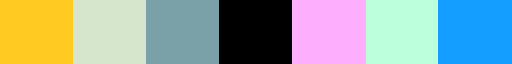

In [36]:
p.legend_dict[attributes[0]]['cmap']

In [37]:
p.legend_dict[attributes[2]]['values']

['vr', 'inconnu', 'vi', 'vs']

## Display one object (attribute = 'lithology')

In [38]:
bh = 6
p.boreholes_3d[bh].components

{0: [Component({'lithology': 'sable'}),
  Component({'arsenic': 'vi'}),
  Component({'cadmium': 'vr'})],
 1: [Component({'lithology': 'argile'}),
  Component({'arsenic': 'inconnu'}),
  Component({'cadmium': 'vs'})],
 2: [Component({'lithology': 'marne'}),
  Component({'arsenic': 'vs'}),
  Component({'cadmium': 'vr'})],
 3: [Component({'lithology': 'charbon'}),
  Component({'arsenic': 'vr'}),
  Component({'cadmium': 'vr'})],
 4: [Component({'lithology': 'dolomie'}),
  Component({'arsenic': 'inconnu'}),
  Component({'cadmium': 'inconnu'})],
 5: [Component({'lithology': 'calcaire'}),
  Component({'arsenic': 'vs'}),
  Component({'cadmium': 'vr'})]}

/home/yanathan/Projects/GSDMA/utils/visual.py:425: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "'". Passing invalid values is deprecated since 3.4 and will become an error two minor releases later.
  rect = mpl.patches.Rectangle(origin, w, thick, fc=fc, lw=lw, hatch=d.hatch,
/home/yanathan/Projects/GSDMA/utils/visual.py:425: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "'=". Passing invalid values is deprecated since 3.4 and will become an error two minor releases later.
  rect = mpl.patches.Rectangle(origin, w, thick, fc=fc, lw=lw, hatch=d.hatch,
/home/yanathan/.local/share/virtualenvs/GSDMA-DRfwm83x/lib/python3.8/site-packages/striplog/legend.py:311: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "'=". Passing invalid values is deprecated since 3

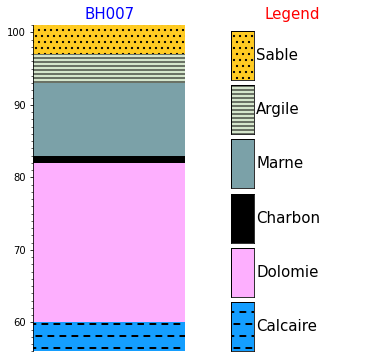

In [39]:
p.boreholes_3d[bh].log_plot()

In [40]:
sargs = dict(title='Test_legend', title_font_size=30, label_font_size=12, n_labels=0,
             fmt="%.2f", font_family="arial", color='k',interactive=True, 
             vertical=True, italic=True, shadow=False,)

In [41]:
p.boreholes_3d[bh].plot3d(custom_legend=False, scalar_bar_args=sargs)

ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

## Plot with another attribute

/home/yanathan/Projects/GSDMA/utils/visual.py:425: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "'". Passing invalid values is deprecated since 3.4 and will become an error two minor releases later.
  rect = mpl.patches.Rectangle(origin, w, thick, fc=fc, lw=lw, hatch=d.hatch,
/home/yanathan/Projects/GSDMA/utils/visual.py:425: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "'=". Passing invalid values is deprecated since 3.4 and will become an error two minor releases later.
  rect = mpl.patches.Rectangle(origin, w, thick, fc=fc, lw=lw, hatch=d.hatch,
/home/yanathan/.local/share/virtualenvs/GSDMA-DRfwm83x/lib/python3.8/site-packages/striplog/legend.py:311: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "'=". Passing invalid values is deprecated since 3

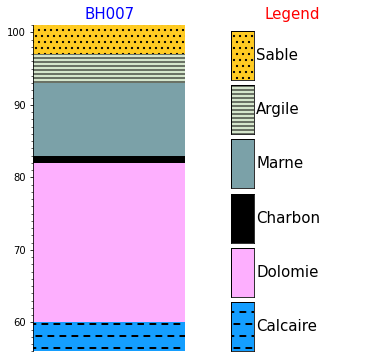

In [42]:
at = 0
p.boreholes_3d[bh].log_plot(repr_attribute=attributes[at])

In [43]:
p.boreholes_3d[bh].plot3d(repr_attribute=attributes[at])

ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

In [44]:
p.boreholes_orm[0].intervals_values

2021-08-07 23:16:55,459 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id", "Intervals".data_id AS "Intervals_data_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-08-07 23:16:55,461 INFO sqlalchemy.engine.Engine [cached since 2.763s ago] ('BH001',)


{0: '{"lithology": "sable"}, {"arsenic": "vs"}, {"cadmium": "vr"}', 1: '{"lithology": "argile"}, {"arsenic": "vs"}, {"cadmium": "vr"}', 2: '{"lithology": "marne"}, {"arsenic": "inconnu"}, {"cadmium": "vr"}', 3: '{"lithology": "charbon"}, {"arsenic": "vi"}, {"cadmium": "vr"}'}

In [45]:
p.boreholes_3d[bh].intervals[0]

Interval({'top': Position({'middle': 101.0, 'x': 152794.0, 'y': 121111.0, 'units': 'm'}), 'base': Position({'middle': 97.0, 'x': 152794.0, 'y': 121111.0, 'units': 'm'}), 'description': '{"lithology": "sable"}, {"arsenic": "vi"}, {"cadmium": "vr"}', 'data': {}, 'components': [Component({'lithology': 'sable'}), Component({'arsenic': 'vi'}), Component({'cadmium': 'vr'})]})

### Display project boreholes

In [46]:
bh3d_vtk = p.boreholes_3d[bh]._vtk
bh3d_vtk

PolyData (0x7f1ccffea220)
  N Cells:	312
  N Points:	1200
  X Bounds:	1.528e+05, 1.528e+05
  Y Bounds:	1.211e+05, 1.211e+05
  Z Bounds:	5.600e+01, 1.010e+02
  N Arrays:	6

In [47]:
at = 1
p.plot3d(repr_attribute=attributes[at],  bg_color=["royalblue", "aliceblue"], 
                      window_size=(800, 500))

2021-08-07 23:16:55.514 (   4.284s) [        2FF43740]vtkDataSetAttributes.cx:1296  WARN| vtkPointData (0x389ef90): Can not set attribute Scalars. Only vtkDataArray subclasses can be set as active attributes.


### Boreholes in 3D using X3D for interaction within the notebook

In [48]:
type(p.boreholes_3d[0].omf_legend)

omf.data.Legend